In [1]:
import pandas as pd

In [2]:
facts  = ""
with open("recipe_model_tapp23_parallel_violation.pl","r") as file:
    for l in file:
        #if l.strip().startswith("%"):
        #    continue
        
        facts += l.strip() + "\n"

In [3]:
from clingo.symbol import Number
from clingo.control import Control

ctl = Control()
ctl.add("base", [], facts)

In [4]:
ctl.ground([("base", [])])
solver = ctl.solve(yield_=True)

recipe_model_tapp23_analysis.pl:119:14-16: info: global variable in tuple of aggregate element:
  S1

recipe_model_tapp23_analysis.pl:125:14-17: info: global variable in tuple of aggregate element:
  Sid



In [5]:
output = []
for x in solver:
    output.append(x)

In [6]:
df_output = {}
df_output_str = {}
for s in x.context.symbolic_atoms.signatures:
    #print(s)
    df_output[(s[0],s[1])] = []
    df_output_str[(s[0],s[1])] = []
    for y in x.context.symbolic_atoms.by_signature(s[0],s[1]):
        temp_tuple = [y.symbol.name]
        temp_tuple = temp_tuple + [str(z) for z in y.symbol.arguments]
        df_output[(s[0],s[1])].append(y.symbol)
        df_output_str[(s[0],s[1])].append(temp_tuple)

In [7]:
from IPython.display import Image
#%input gv_string
def generate_pdf(gv_string,filename="temp"):
    input = filename+".gv"
    with open(input,"w") as file:
        file.write(gv_string)
    output = filename+".png"    
    !dot -Tpng -o $output $input   
    return Image(filename=output) 

# Serial Violation

In [8]:
import pandas as pd

recipe_case = "r1_serial_violation"
derived_dependency_pd = pd.DataFrame(df_output_str[("derived_process_clean",10)]).sort_values([2,8])
derived_dependency_pd = derived_dependency_pd[derived_dependency_pd[1]==recipe_case]
derived_dependency_pd

,0,1,2,3,4,5,6,7,8,9,10
90,derived_process_clean,r1_serial_violation,0,4,"schema_state(cs6,4)","schema_state(cs8,5)","schema_state(cs9,9)",p5,5,p9,9
52,derived_process_clean,r1_serial_violation,0,1,"schema_state(cs3,7)","schema_state(cs3,8)","schema_state(cs9,9)",p8,8,p9,9
30,derived_process_clean,r1_serial_violation,1,2,"schema_state(cs3,-1)","schema_state(cs3,7)","schema_state(cs3,8)",p7,7,p8,8
8,derived_process_clean,r1_serial_violation,2,-1,-1,"schema_state(cs3,-1)","schema_state(cs3,7)",-1,-1,p7,7
73,derived_process_clean,r1_serial_violation,3,5,"schema_state(cs5,3)","schema_state(cs7,4)","schema_state(csRemoved,6)",p4,4,p6,6
71,derived_process_clean,r1_serial_violation,4,5,"schema_state(cs5,3)","schema_state(cs6,4)","schema_state(csRemoved,5)",p4,4,p5,5
72,derived_process_clean,r1_serial_violation,4,5,"schema_state(cs5,3)","schema_state(cs6,4)","schema_state(cs8,5)",p4,4,p5,5
50,derived_process_clean,r1_serial_violation,5,6,"schema_state(cs5,2)","schema_state(cs5,3)","schema_state(cs6,4)",p3,3,p4,4
51,derived_process_clean,r1_serial_violation,5,6,"schema_state(cs5,2)","schema_state(cs5,3)","schema_state(cs7,4)",p3,3,p4,4
29,derived_process_clean,r1_serial_violation,6,7,"schema_state(cs5,-1)","schema_state(cs5,2)","schema_state(cs5,3)",p2,2,p3,3


In [9]:
import pandas as pd
parallel_violation_pd = pd.DataFrame(df_output_str[("parallel_recipe_violation",12)])
parallel_violation_pd = parallel_violation_pd[parallel_violation_pd[1]==recipe_case]
parallel_violation_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,parallel_recipe_violation,r1_serial_violation,0,9,"seq(8,9)",9,"seq(seq(0,1),seq(seq(1,b1),seq(seq(b1,2),seq(s...",0,p9,"schema_state(cs3,8)","schema_state(cs9,9)",cs2,9
3,parallel_recipe_violation,r1_serial_violation,0,9,"seq(8,9)",9,"seq(seq(0,1),seq(seq(1,b1),seq(seq(b1,2),seq(s...",0,p9,"schema_state(cs8,5)","schema_state(cs9,9)",cs2,9


In [10]:
violation_set = parallel_violation_pd[[9,10,8,12]]
violation_set = violation_set.drop_duplicates()
violation_set

,9,10,8,12
0,"schema_state(cs3,8)","schema_state(cs9,9)",p9,9
3,"schema_state(cs8,5)","schema_state(cs9,9)",p9,9


In [11]:
violation_set[9].apply(lambda x: x.split(",")[0].split("(")[-1]).unique()

array(['cs3', 'cs8'], dtype=object)

In [12]:
violation_edges = []
process_violation = set()
for p in violation_set.to_records():
    #print(x)
    violation_edges.append('"{input}" -> "{sid}.{pid}"'.format(input=p[1],sid=p[4],pid=p[3]))
    violation_edges.append('"{sid}.{pid}" -> "{output}"'.format(output=p[2],sid=p[4],pid=p[3]))
    process_violation.add('"{sid}.{pid}"'.format(sid=p[4],pid=p[3]))
print(violation_edges,process_violation)

['"schema_state(cs3,8)" -> "9.p9"', '"9.p9" -> "schema_state(cs9,9)"', '"schema_state(cs8,5)" -> "9.p9"', '"9.p9" -> "schema_state(cs9,9)"'] {'"9.p9"'}


In [13]:
process_input_pd = pd.DataFrame(df_output_str[("process_input",3)])
#set(process_input_pd[process_input_pd[1] == p[10]][3].unique()) - set(violation_set[9].apply(lambda x: x.split(",")[0].split("(")[-1]).unique())

In [14]:
set(violation_set[9].apply(lambda x: x.split(",")[0].split("(")[-1]).unique())

{'cs3', 'cs8'}

In [15]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

edges_defined = set()
column_set = {x[1]:x[3] for x in df_output_str[("column_schema",3)]}
column_set["csRemoved"] = "removed"
column_set["csNone"] = "none"
process_set = {x[1]:x[2] for x in df_output_str[("process",2)]}

for p in derived_dependency_pd.to_records():
    #print(p)
    # workflow step/process nodes
    
    process_state = '"{sid}.{pid}"'.format(sid=p[11],pid=p[10])
    
    if process_state in process_violation:
        single_process+='''
        "{sid}.{pid}" [shape=record color="#ff0000" rankdir=LR label="{{<f0> {process_name} (s{sid}:{pid}) }}"];
        '''.format(sid=p[11],pid=p[10],process_name=process_set[p[10]].replace('"','\\"'))
    else:
        single_process+='''
        "{sid}.{pid}" [shape=record rankdir=LR label="{{<f0> {process_name} (s{sid}:{pid}) }}"];
        '''.format(sid=p[11],pid=p[10],process_name=process_set[p[10]].replace('"','\\"'))


    '''
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3].replace('"','\\"'))
    edges+="""
        {output} -> {input} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="", style=dashed, arrowhead=none]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])  
    '''
        
    #if p[5].split(",")[-1]==p[11].split(",")[-1]:    
    input_edge = '"{input}" -> "{sid}.{pid}"'.format(input=p[6],sid=p[11],pid=p[10])  
    output_edge = '"{sid}.{pid}" -> "{output}"'.format(output=p[7],sid=p[11],pid=p[10])        


    
    if input_edge not in edges_defined:
        # schema nodes
        column_nodes+="""
        "{input}" [shape=record rankdir=LR label="{{<f0> {label} ({pid}) }}"]
        """.format(input=p[6],
                   label=column_set[p[6].split(",")[0].split("(")[-1]].replace('"','\\"'),
                   pid=p[6].split(",")[0].split("(")[-1]
                  )   

        edges_defined.add(input_edge)

        if input_edge in violation_edges:
            #print("input edge violation")
            edges+="""
                "{input}" -> "{sid}.{pid}" [label="" weight=14 color="#ff0000" tooltip="" labeltooltip=""]    
            """.format(input=p[6],sid=p[11],pid=p[10])
            
            # missing violation edges
            # add missing violation edges
            for missing_cs in set(process_input_pd[process_input_pd[1] == p[10]][3].unique()) - set(violation_set[9].apply(lambda x: x.split(",")[0].split("(")[-1]).unique()) - \
                set(derived_dependency_pd[derived_dependency_pd[2]==p[3]][5].apply(lambda x: x.split(",")[0].split("(")[-1]).unique()):                
            #for missing_cs in set(violation_set[9].apply(lambda x: x.split(",")[0].split("(")[-1]).unique()):                
                #print(missing_cs)
                column_nodes+="""
                "missing({state},{input})" [shape=record rankdir=LR color="#ff0000" label="{{<f0> {label} ({pid}) }}"]
                """.format(input=missing_cs,
                           state=p[11],
                           label=column_set[missing_cs].replace('"','\\"'),
                           pid=missing_cs
                          )   

                input_edge = '"missing({sid},{input})" -> "{sid}.{pid}"'.format(input=missing_cs,sid=p[11],pid=p[10])  
                
                if input_edge not in edges_defined:
                    edges_defined.add(input_edge)
                    
                    edges+="""
                        {input_edge} [label="" weight=14 color="#ff0000" tooltip="" labeltooltip=""]    
                    """.format(input_edge=input_edge,sid=p[11],pid=p[10])

        else:
            edges+="""
                "{input}" -> "{sid}.{pid}" [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
            """.format(input=p[6],sid=p[11],pid=p[10])         

    cs_out = p[7].split(",")[0].split("(")[-1]
            
    if cs_out != "csRemoved":
        # no output edge needed

        if output_edge not in edges_defined:
            # schema nodes
            column_nodes+="""
            "{output}" [shape=record rankdir=LR label="{{<f0> {label} ({pid}) }}"]
            """.format(output=p[7],
                       label=column_set[p[7].split(",")[0].split("(")[-1]].replace('"','\\"'),
                      pid=p[7].split(",")[0].split("(")[-1]
                      )

            edges_defined.add(output_edge)

            if output_edge in violation_edges:
                #print("input edge violation")
                edges+="""
                    "{sid}.{pid}" -> "{output}"  [label="" weight=14 color="#ff0000" tooltip="" labeltooltip=""]    
                """.format(output=p[7],sid=p[11],pid=p[10])       
            else:
                edges+="""
                    "{sid}.{pid}" -> "{output}"  [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
                """.format(output=p[7],sid=p[11],pid=p[10])        
                        

gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer


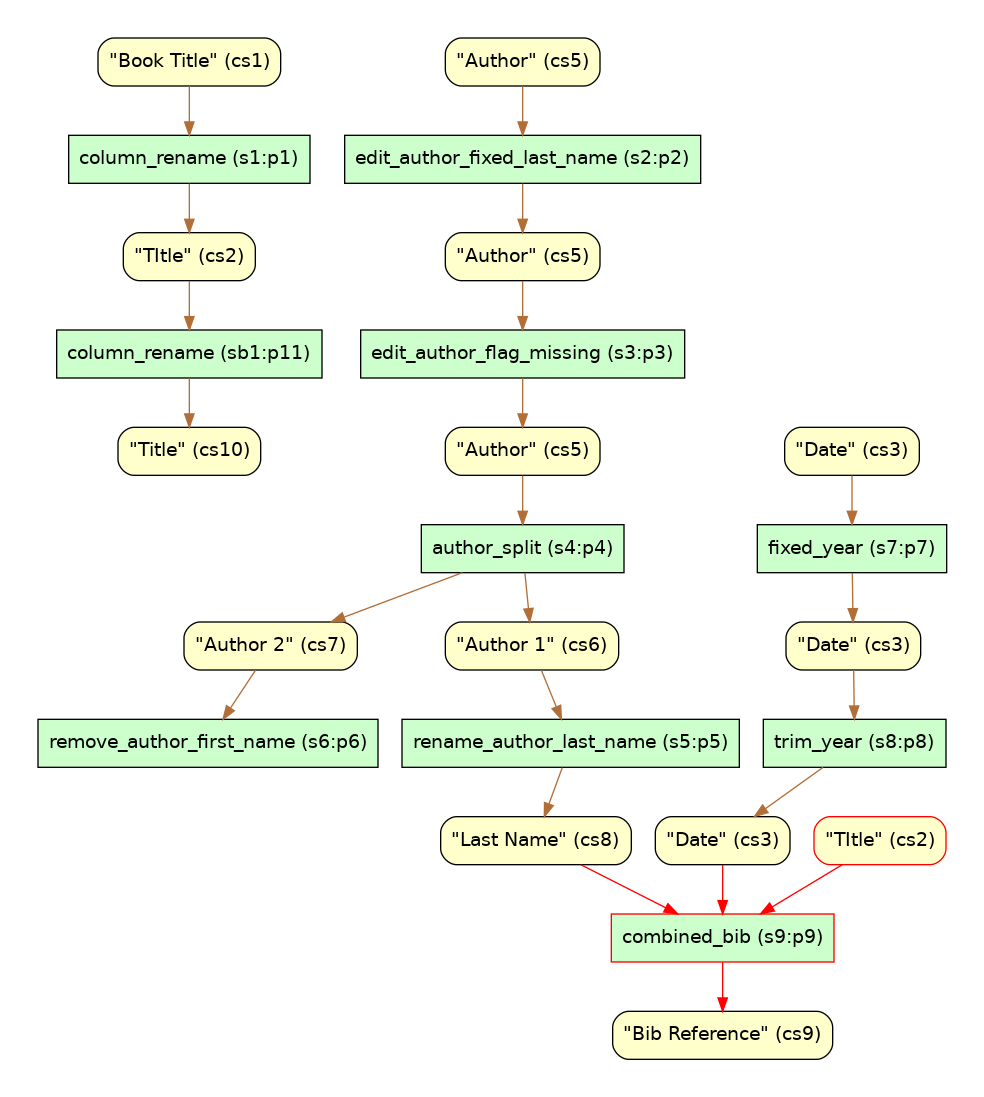

In [16]:
generate_pdf(gv_string,"recipe_serial_violation")

# Parallel Workflow Violation

In [17]:
import pandas as pd

# 3 case of violations
# r1_parallel_violation_1, similar to serial_violation, missing dependency
# r1_parallel_violation_2, read and write violation
# r1_parallel_violation_3, missing dependency violation
# r1_parallel_violation_4, parallel workflow missing required link (workflow connectivity)

recipe_case = "r1_parallel_violation_2"
#recipe_case = "r1_parallel_violation_3"
#recipe_case = "r1_parallel_violation_4"
derived_dependency_pd = pd.DataFrame(df_output_str[("derived_process_clean",10)]).sort_values([2,8])
derived_dependency_pd = derived_dependency_pd[derived_dependency_pd[1]==recipe_case]
derived_dependency_pd

,0,1,2,3,4,5,6,7,8,9,10
94,derived_process_clean,r1_parallel_violation_2,0,-1,-1,"schema_state(cs1,-1)","schema_state(cs2,b6)",-1,-1,p1,b6
95,derived_process_clean,r1_parallel_violation_2,0,-1,-1,"schema_state(cs1,-1)","schema_state(csRemoved,b6)",-1,-1,p1,b6
35,derived_process_clean,r1_parallel_violation_2,0,1,"schema_state(cs1,-1)","schema_state(cs2,1)","schema_state(cs9,9)",p1,1,p9,9
92,derived_process_clean,r1_parallel_violation_2,0,1,"schema_state(cs6,4)","schema_state(cs8,5)","schema_state(cs9,9)",p5,5,p9,9
58,derived_process_clean,r1_parallel_violation_2,0,1,"schema_state(cs3,7)","schema_state(cs3,8)","schema_state(cs9,9)",p8,8,p9,9
12,derived_process_clean,r1_parallel_violation_2,1,-1,-1,"schema_state(cs1,-1)","schema_state(cs2,1)",-1,-1,p1,1
100,derived_process_clean,r1_parallel_violation_2,1,-1,-1,"schema_state(cs1,-1)","schema_state(csRemoved,1)",-1,-1,p1,1
77,derived_process_clean,r1_parallel_violation_2,1,2,"schema_state(cs5,3)","schema_state(cs6,4)","schema_state(csRemoved,5)",p4,4,p5,5
78,derived_process_clean,r1_parallel_violation_2,1,2,"schema_state(cs5,3)","schema_state(cs6,4)","schema_state(cs8,5)",p4,4,p5,5
79,derived_process_clean,r1_parallel_violation_2,1,2,"schema_state(cs5,3)","schema_state(cs7,4)","schema_state(csRemoved,6)",p4,4,p13,6


In [18]:
import pandas as pd
parallel_violation_pd = pd.DataFrame(df_output_str[("parallel_recipe_violation",12)])
parallel_violation_pd = parallel_violation_pd[parallel_violation_pd[1]==recipe_case]
parallel_violation_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12
6,parallel_recipe_violation,r1_parallel_violation_2,0,b6,"seq(6,b6)",4,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",0,p1,"schema_state(cs1,-1)","schema_state(cs2,b6)",cs1,b6
7,parallel_recipe_violation,r1_parallel_violation_2,0,b6,"seq(6,b6)",4,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",0,p1,"schema_state(cs1,-1)","schema_state(csRemoved,b6)",cs1,b6
8,parallel_recipe_violation,r1_parallel_violation_2,0,9,"seq(0,1)",0,"seq(seq(0,1),seq(1,9,0),1)",1,p1,"schema_state(cs1,-1)","schema_state(cs2,1)",cs1,1
9,parallel_recipe_violation,r1_parallel_violation_2,0,9,"seq(0,1)",0,"seq(seq(0,1),seq(1,9,0),1)",1,p1,"schema_state(cs1,-1)","schema_state(csRemoved,1)",cs1,1
10,parallel_recipe_violation,r1_parallel_violation_2,0,9,"seq(0,2)",0,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",4,p2,"schema_state(cs5,-1)","schema_state(cs5,2)",cs5,2
11,parallel_recipe_violation,r1_parallel_violation_2,0,b6,"seq(0,2)",0,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",4,p2,"schema_state(cs5,-1)","schema_state(cs5,2)",cs5,2
12,parallel_recipe_violation,r1_parallel_violation_2,0,b6,"seq(4,6)",3,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",1,p13,"schema_state(cs7,4)","schema_state(cs3,6)",cs7,6
16,parallel_recipe_violation,r1_parallel_violation_2,0,9,"seq(7,8)",1,"seq(seq(0,7),seq(seq(7,8),seq(8,9,0),1),2)",1,p8,"schema_state(cs3,7)","schema_state(cs3,8)",cs3,8
17,parallel_recipe_violation,r1_parallel_violation_2,0,9,"seq(0,7)",0,"seq(seq(0,7),seq(seq(7,8),seq(8,9,0),1),2)",2,p7,"schema_state(cs3,-1)","schema_state(cs3,7)",cs3,7
20,parallel_recipe_violation,r1_parallel_violation_2,0,9,"seq(2,3)",1,"seq(seq(0,2),seq(seq(2,3),seq(seq(3,4),seq(seq...",3,p3,"schema_state(cs5,2)","schema_state(cs5,3)",cs5,3


In [19]:
violation_set = parallel_violation_pd[[9,10,8,12]]
violation_set = violation_set.drop_duplicates()
violation_set

,9,10,8,12
6,"schema_state(cs1,-1)","schema_state(cs2,b6)",p1,b6
7,"schema_state(cs1,-1)","schema_state(csRemoved,b6)",p1,b6
8,"schema_state(cs1,-1)","schema_state(cs2,1)",p1,1
9,"schema_state(cs1,-1)","schema_state(csRemoved,1)",p1,1
10,"schema_state(cs5,-1)","schema_state(cs5,2)",p2,2
12,"schema_state(cs7,4)","schema_state(cs3,6)",p13,6
16,"schema_state(cs3,7)","schema_state(cs3,8)",p8,8
17,"schema_state(cs3,-1)","schema_state(cs3,7)",p7,7
20,"schema_state(cs5,2)","schema_state(cs5,3)",p3,3


In [20]:
violation_edges = []
process_violation = set()
for p in violation_set.to_records():
    #print(x)
    violation_edges.append('"{input}" -> "{sid}.{pid}"'.format(input=p[1],sid=p[4],pid=p[3]))
    violation_edges.append('"{sid}.{pid}" -> "{output}"'.format(output=p[2],sid=p[4],pid=p[3]))
    process_violation.add('"{sid}.{pid}"'.format(sid=p[4],pid=p[3]))
#print(violation_edges,process_violation)

In [21]:
process_input_pd = pd.DataFrame(df_output_str[("process_input",3)])
#set(process_input_pd[process_input_pd[1] == p[10]][3].unique()) - set(violation_set[9].apply(lambda x: x.split(",")[0].split("(")[-1]).unique())

In [22]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

edges_defined = set()
column_set = {x[1]:x[3] for x in df_output_str[("column_schema",3)]}
column_set["csRemoved"] = "removed"
column_set["csNone"] = "none"
process_set = {x[1]:x[2] for x in df_output_str[("process",2)]}

for p in derived_dependency_pd.to_records():
    #print(p)
    # workflow step/process nodes
    
    process_state = '"{sid}.{pid}"'.format(sid=p[11],pid=p[10])
    
    if process_state in process_violation:
        single_process+='''
        "{sid}.{pid}" [shape=record color="#ff0000" rankdir=LR label="{{<f0> {process_name} (s{sid}:{pid}) }}"];
        '''.format(sid=p[11],pid=p[10],process_name=process_set[p[10]].replace('"','\\"'))
    else:
        single_process+='''
        "{sid}.{pid}" [shape=record rankdir=LR label="{{<f0> {process_name} (s{sid}:{pid}) }}"];
        '''.format(sid=p[11],pid=p[10],process_name=process_set[p[10]].replace('"','\\"'))


    '''
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3].replace('"','\\"'))
    edges+="""
        {output} -> {input} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="", style=dashed, arrowhead=none]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])  
    '''
        
    #if p[5].split(",")[-1]==p[11].split(",")[-1]:    
    input_edge = '"{input}" -> "{sid}.{pid}"'.format(input=p[6],sid=p[11],pid=p[10])  
    output_edge = '"{sid}.{pid}" -> "{output}"'.format(output=p[7],sid=p[11],pid=p[10])        


    
    if input_edge not in edges_defined:
        # schema nodes
        column_nodes+="""
        "{input}" [shape=record rankdir=LR label="{{<f0> {label} ({pid}) }}"]
        """.format(input=p[6],
                   label=column_set[p[6].split(",")[0].split("(")[-1]].replace('"','\\"'),
                   pid=p[6].split(",")[0].split("(")[-1]
                  )   

        edges_defined.add(input_edge)

        if input_edge in violation_edges:
            #print("input edge violation")
            edges+="""
                "{input}" -> "{sid}.{pid}" [label="" weight=14 color="#ff0000" tooltip="" labeltooltip=""]    
            """.format(input=p[6],sid=p[11],pid=p[10])
            
            # missing violation edges
            # add missing violation edges
            for missing_cs in set(process_input_pd[process_input_pd[1] == p[10]][3].unique()) - set(violation_set[9].apply(lambda x: x.split(",")[0].split("(")[-1]).unique()) - \
                set(derived_dependency_pd[derived_dependency_pd[2]==p[3]][5].apply(lambda x: x.split(",")[0].split("(")[-1]).unique()):                
            #for missing_cs in set(violation_set[9].apply(lambda x: x.split(",")[0].split("(")[-1]).unique()):                
                #print(missing_cs)
                column_nodes+="""
                "missing({state},{input})" [shape=record rankdir=LR color="#ff0000" label="{{<f0> {label} ({pid}) }}"]
                """.format(input=missing_cs,
                           state=p[11],
                           label=column_set[missing_cs].replace('"','\\"'),
                           pid=missing_cs
                          )   

                input_edge = '"missing({sid},{input})" -> "{sid}.{pid}"'.format(input=missing_cs,sid=p[11],pid=p[10])  
                
                if input_edge not in edges_defined:
                    edges_defined.add(input_edge)
                    
                    edges+="""
                        {input_edge} [label="" weight=14 color="#ff0000" tooltip="" labeltooltip=""]    
                    """.format(input_edge=input_edge,sid=p[11],pid=p[10])

        else:
            edges+="""
                "{input}" -> "{sid}.{pid}" [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
            """.format(input=p[6],sid=p[11],pid=p[10])         

    cs_out = p[7].split(",")[0].split("(")[-1]
            
    if cs_out != "csRemoved":
        # no output edge needed

        if output_edge not in edges_defined:
            # schema nodes
            column_nodes+="""
            "{output}" [shape=record rankdir=LR label="{{<f0> {label} ({pid}) }}"]
            """.format(output=p[7],
                       label=column_set[p[7].split(",")[0].split("(")[-1]].replace('"','\\"'),
                      pid=p[7].split(",")[0].split("(")[-1]
                      )

            edges_defined.add(output_edge)

            if output_edge in violation_edges:
                #print("input edge violation")
                edges+="""
                    "{sid}.{pid}" -> "{output}"  [label="" weight=14 color="#ff0000" tooltip="" labeltooltip=""]    
                """.format(output=p[7],sid=p[11],pid=p[10])       
            else:
                edges+="""
                    "{sid}.{pid}" -> "{output}"  [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
                """.format(output=p[7],sid=p[11],pid=p[10])        
                        

gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer


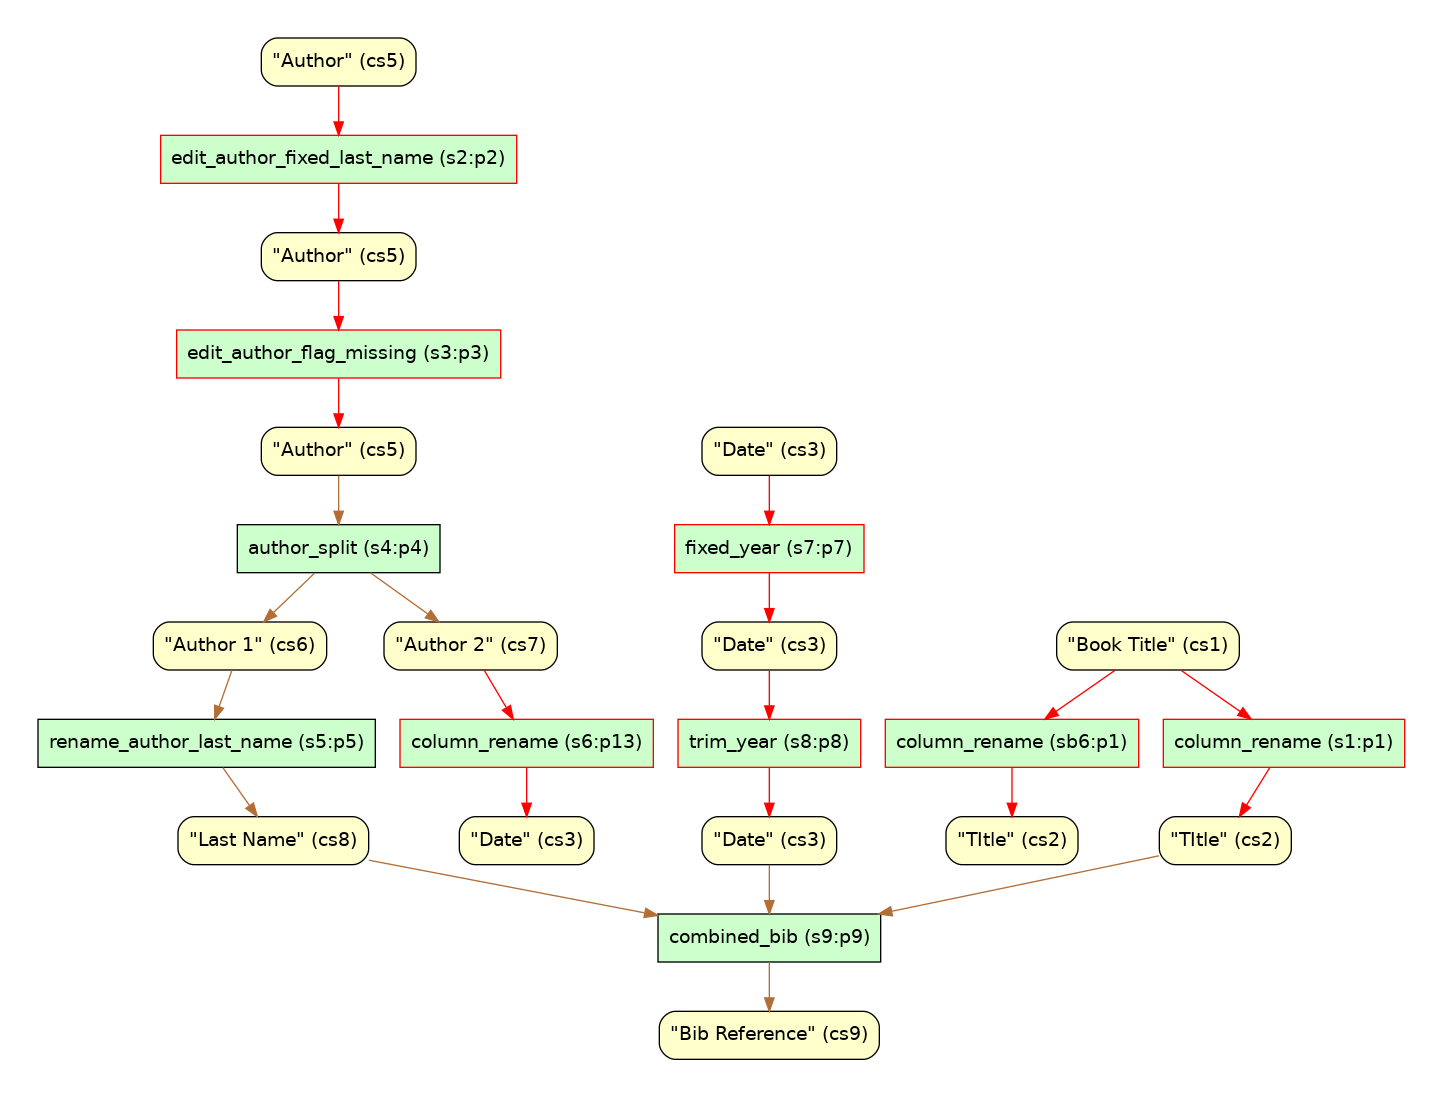

In [23]:
generate_pdf(gv_string,"recipe_parallel_violation")